<a href="https://colab.research.google.com/github/drm69/PCVK25_3F_12/blob/main/Week3_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Firdaus Yuli Darmawan

Kelas : D4TI 3F

NIM   : 2341720244

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
-------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-1752920920.py:19: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


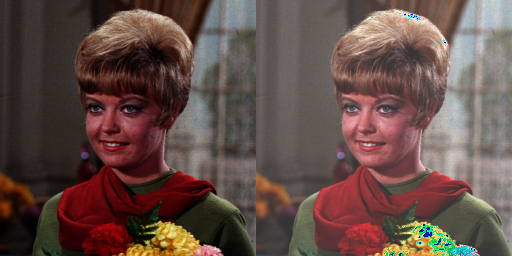

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('-------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

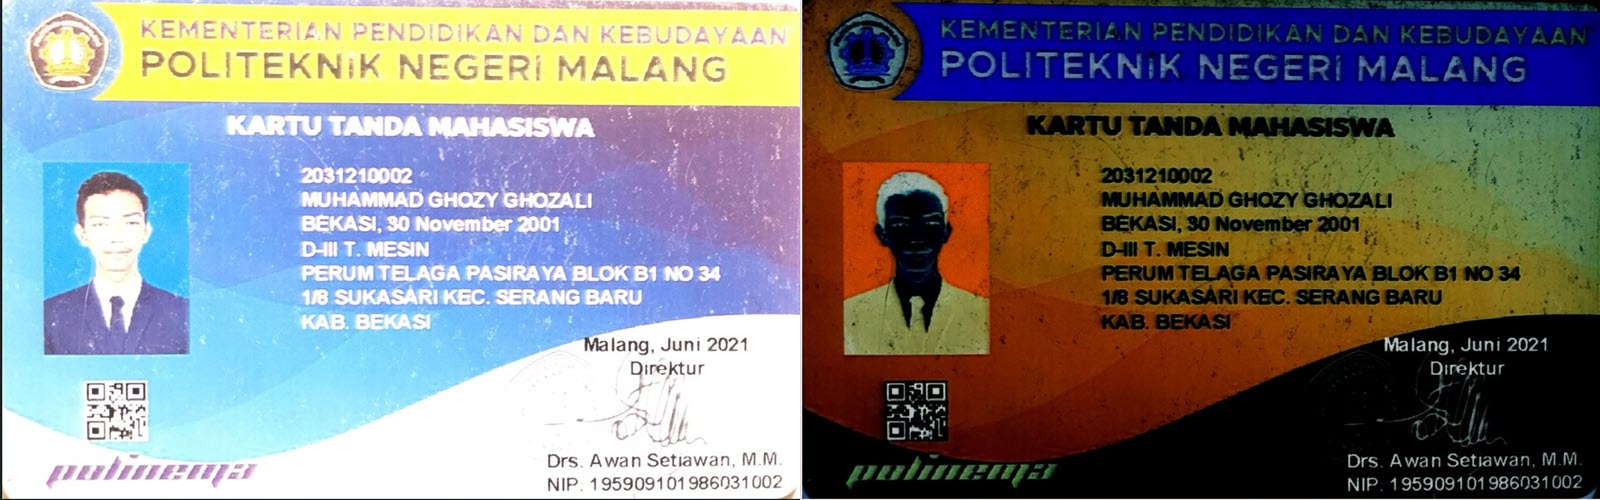

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

img = cv.imread('/content/drive/MyDrive/images/KTM_lama.jpg')

inverse_img = 255 - img

final_frame = cv.hconcat([img, inverse_img])

cv2_imshow(final_frame)
cv.waitKey(0)
cv.destroyAllWindows()


 Mengubah kontras dan tingkat kecerahan citra 
---------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


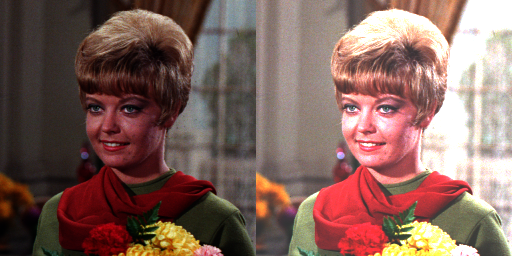

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(" Mengubah kontras dan tingkat kecerahan citra ")
print("---------------------------------------------")

brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

img = cv.imread('/content/drive/MyDrive/images/female.tiff')

new_img = cv.convertScaleAbs(img, alpha=contrast, beta=brightness)

final_frame = cv.hconcat([img, new_img])

cv2_imshow(final_frame)
cv.waitKey(0)
cv.destroyAllWindows()

 Mengubah kecerahan citra dengan Transformasi Log 
-------------------------------------------------
Masukkan nilai kecerahan: 50


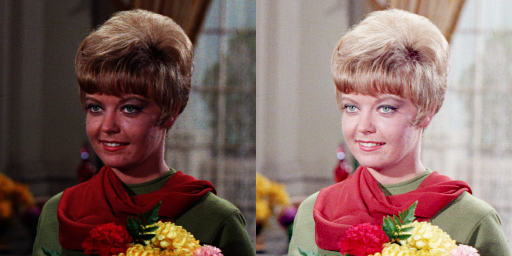

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(" Mengubah kecerahan citra dengan Transformasi Log ")
print("-------------------------------------------------")

c = int(input("Masukkan nilai kecerahan: "))

img = cv.imread('/content/drive/MyDrive/images/female.tiff')
img = img.astype(np.float32)

log_transformed = c * np.log(1 + img)

log_transformed = np.uint8(cv.normalize(log_transformed, None, 0, 255, cv.NORM_MINMAX))

final_frame = cv.hconcat([np.uint8(img), log_transformed])

cv2_imshow(final_frame)
cv.waitKey(0)
cv.destroyAllWindows()

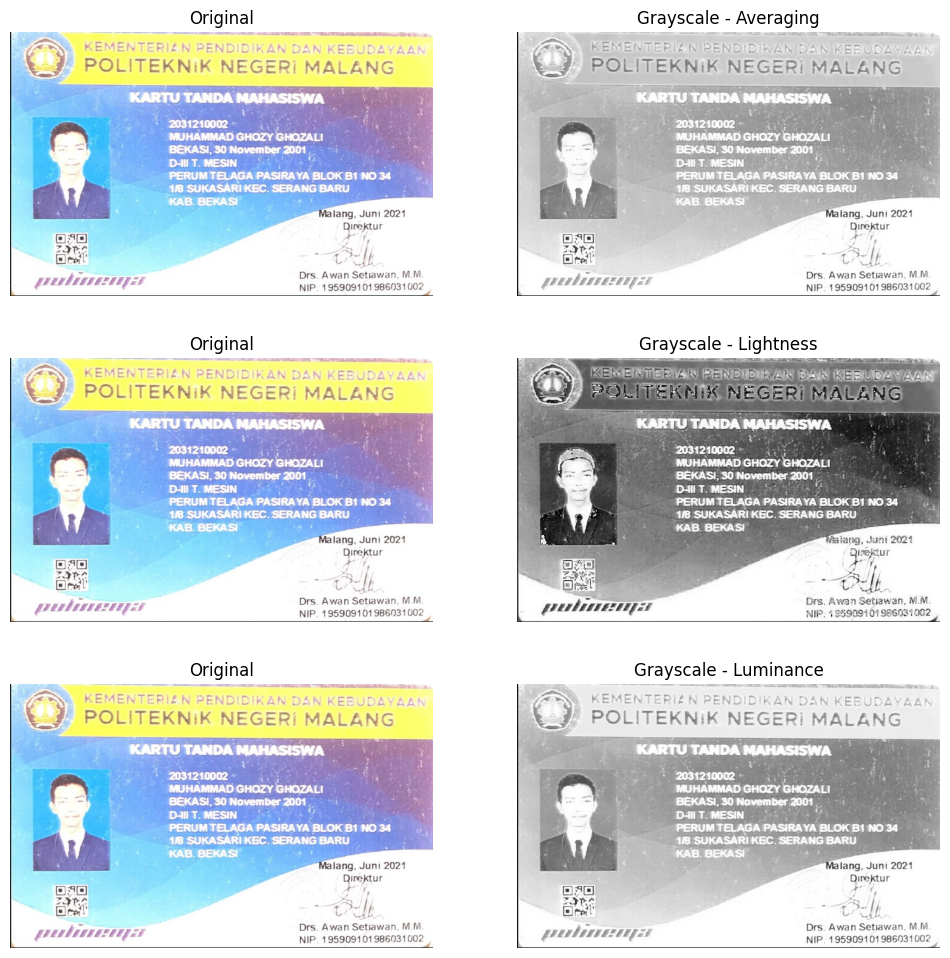

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/images/KTM_lama.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

gray_avg = np.mean(img_rgb, axis=2).astype(np.uint8)

gray_light = ((np.max(img_rgb, axis=2) + np.min(img_rgb, axis=2)) / 2).astype(np.uint8)

# --- Grayscale dengan Luminance ---
gray_lum = (0.299 * img_rgb[:,:,0] +
            0.587 * img_rgb[:,:,1] +
            0.114 * img_rgb[:,:,2]).astype(np.uint8)

# --- Tampilkan hasil ---
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Original + Averaging
axs[0,0].imshow(img_rgb)
axs[0,0].set_title("Original")
axs[0,0].axis("off")
axs[0,1].imshow(gray_avg, cmap='gray')
axs[0,1].set_title("Grayscale - Averaging")
axs[0,1].axis("off")

# Original + Lightness
axs[1,0].imshow(img_rgb)
axs[1,0].set_title("Original")
axs[1,0].axis("off")
axs[1,1].imshow(gray_light, cmap='gray')
axs[1,1].set_title("Grayscale - Lightness")
axs[1,1].axis("off")

# Original + Luminance
axs[2,0].imshow(img_rgb)
axs[2,0].set_title("Original")
axs[2,0].axis("off")
axs[2,1].imshow(gray_lum, cmap='gray')
axs[2,1].set_title("Grayscale - Luminance")
axs[2,1].axis("off")

plt.show()

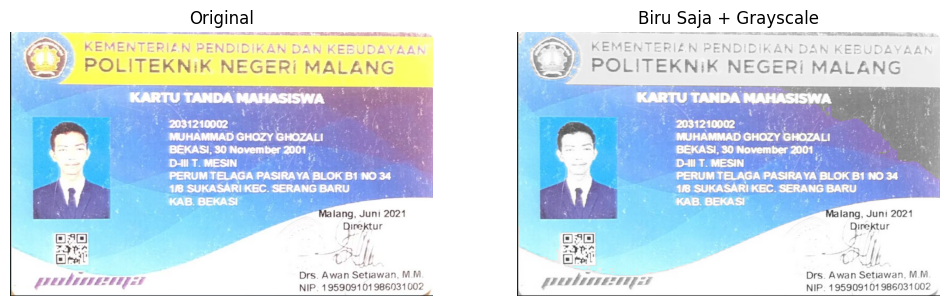

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/images/KTM_lama.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

mask = cv.inRange(hsv, lower_blue, upper_blue)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_rgb = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

result = np.where(mask[:, :, None] != 0, img_rgb, gray_rgb)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img_rgb)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(result)
axs[1].set_title("Biru Saja + Grayscale")
axs[1].axis("off")

plt.show()

Gamma Correction pada citra 
----------------------------
Masukkan nilai Gamma: 3


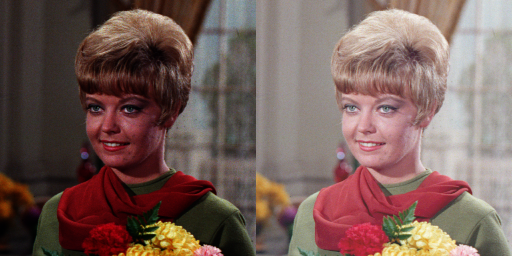

In [16]:
print('Gamma Correction pada citra ')
print('----------------------------')

try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')
  gamma = 1.0

img = cv.imread('/content/drive/MyDrive/images/female.tiff')

gamma_img = np.zeros(img.shape, img.dtype)
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      value = 255 * ((img[y, x, c] / 255) ** (1.0 / gamma))
      gamma_img[y, x, c] = np.clip(value, 0, 255)

final = cv.hconcat([img, gamma_img])
cv2_imshow(final)

Simulasi Image Depth (Kuantisasi Citra)
----------------------------------------


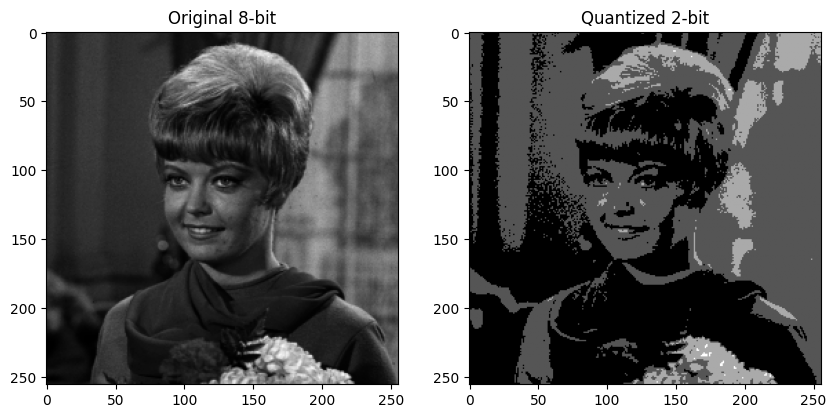

In [17]:
print('Simulasi Image Depth (Kuantisasi Citra)')
print('----------------------------------------')


bit_depth = 2

level = 255 / (pow(2, bit_depth) - 1)

original = cv.imread('/content/drive/MyDrive/images/female.tiff', cv.IMREAD_GRAYSCALE)

quantized = np.zeros(original.shape, dtype=np.uint8)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    value = round(original[y, x] / level) * level
    quantized[y, x] = np.clip(value, 0, 255)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(original, cmap='gray')
ax[0].set_title('Original 8-bit')
ax[1].imshow(quantized, cmap='gray')
ax[1].set_title(f'Quantized {bit_depth}-bit')
plt.show()

Average Denoising
-----------------


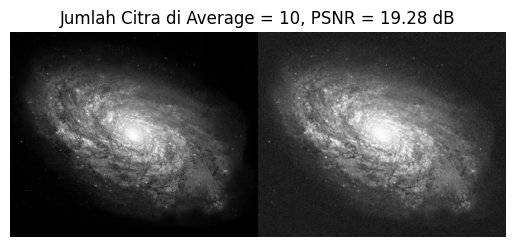

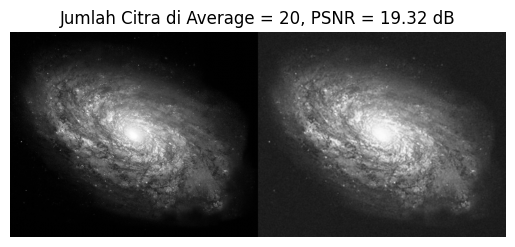

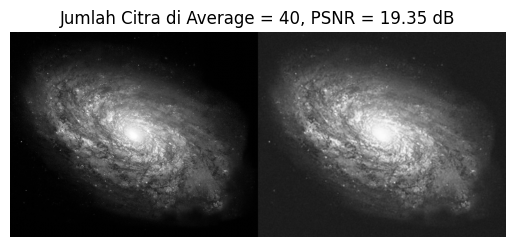

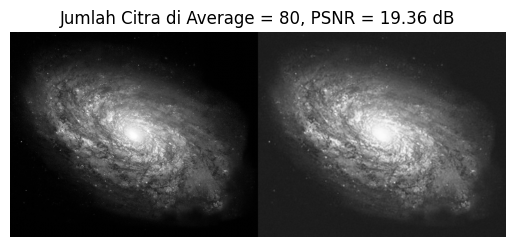

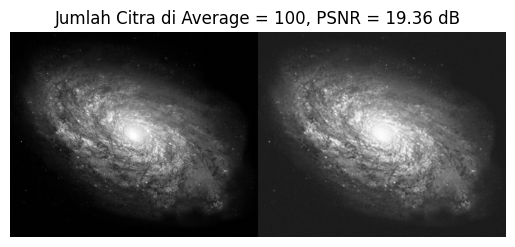

No | Jumlah Citra | PSNR (dB)
--------------------------------
1  | 10           | 19.28
2  | 20           | 19.32
3  | 40           | 19.35
4  | 80           | 19.36
5  | 100          | 19.36


In [18]:
def psnr(img1, img2):
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0:
        return 100
    return 10 * np.log10((255 ** 2) / mse)

print('Average Denoising')
print('-----------------')

original = cv.imread('/content/drive/MyDrive/images/galaxy_ori.jpg')
original_gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
h, w = original_gray.shape[:2]

cv_img = []
for file in glob.glob('/content/drive/MyDrive/images/noises/*.jpg'):
    img = cv.imread(file, cv.IMREAD_GRAYSCALE)
    img_resized = cv.resize(img, (w, h))
    cv_img.append(img_resized)

num_list = [10, 20, 40, 80, 100]
psnr_values = []

for n in num_list:
    avg_img = np.zeros_like(original_gray, dtype=np.float32)
    for i in range(n):
        avg_img += cv_img[i].astype(np.float32)
    avg_img = avg_img / n
    avg_img = np.clip(avg_img, 0, 255).astype(np.uint8)

    val = psnr(original_gray, avg_img)
    psnr_values.append(val)

    final = cv.hconcat([original_gray, avg_img])
    plt.imshow(final, cmap='gray')
    plt.title(f'Jumlah Citra di Average = {n}, PSNR = {val:.2f} dB')
    plt.axis('off')
    plt.show()

print("No | Jumlah Citra | PSNR (dB)")
print("--------------------------------")
for i, n in enumerate(num_list):
    print(f"{i+1}  | {n:<12} | {psnr_values[i]:.2f}")

Dari hasil PSNR yang tercatat pada tabel di atas, dapat disimpulkan bahwa semakin banyak jumlah citra noisy yang di-average, nilai PSNR hasil rekonstruksi semakin tinggi. PSNR yang lebih tinggi berarti kualitas citra hasil average semakin mendekati citra asli, karena noise berhasil ditekan dengan penggabungan lebih banyak citra.

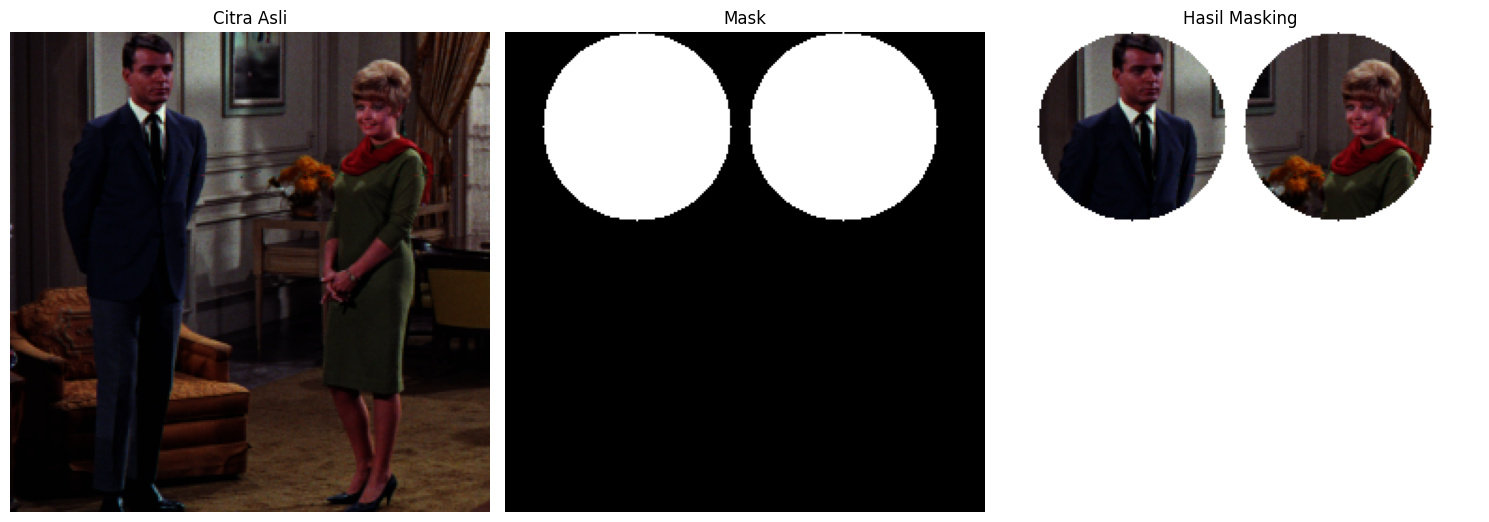

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/images/couple.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2], dtype="uint8")

cv.circle(mask, (70, 50), 50, 255, -1)
cv.circle(mask, (180, 50), 50, 255, -1)
masked = cv.bitwise_and(img, img, mask=mask)

background = np.ones_like(img, dtype="uint8") * 255
background[mask == 255] = masked[mask == 255]

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(background)
plt.title("Hasil Masking")
plt.axis("off")

plt.tight_layout()
plt.show()

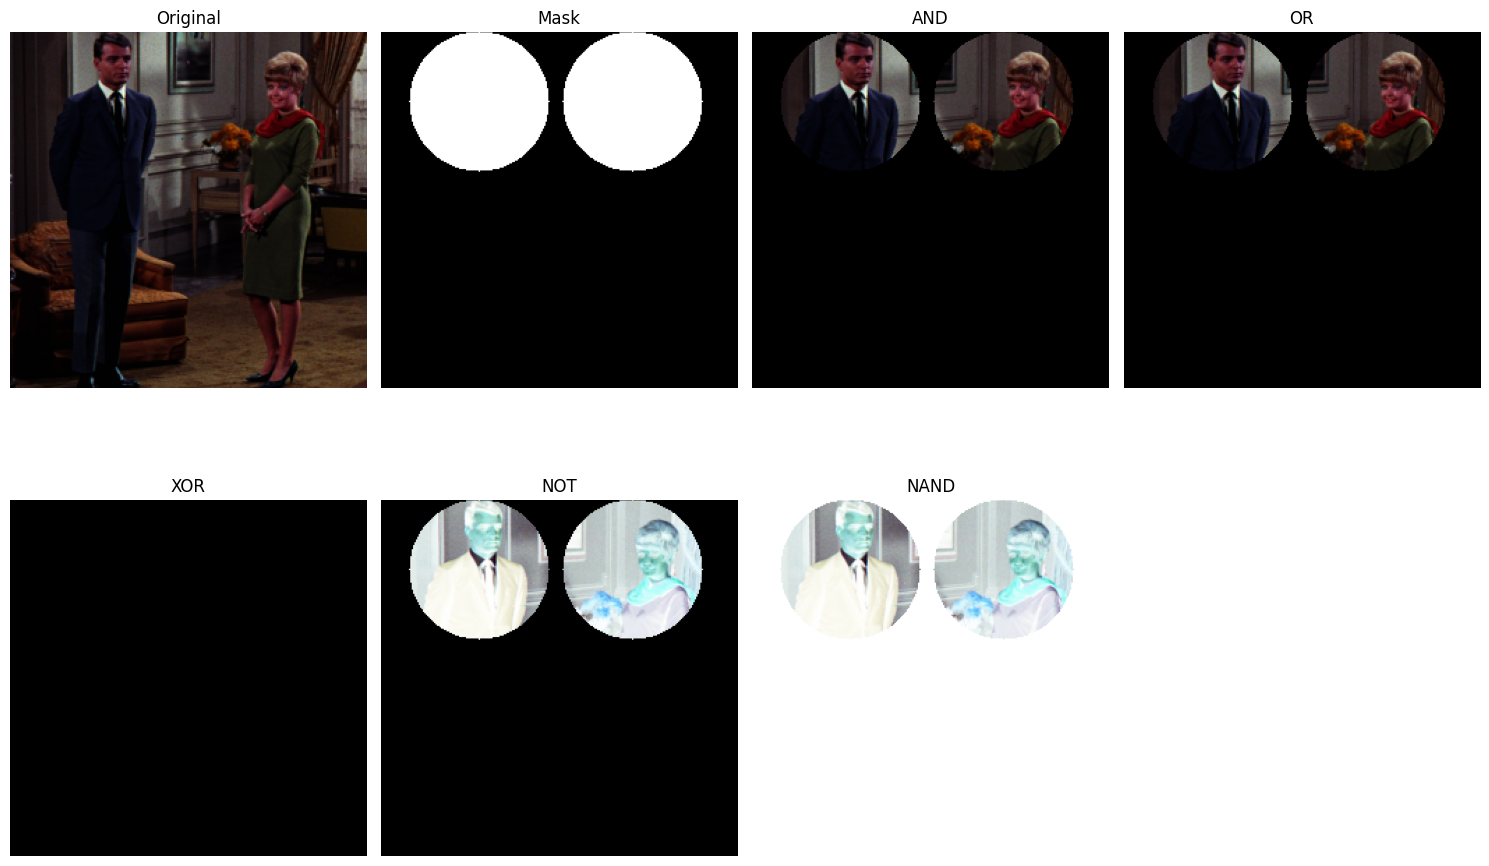

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/images/couple.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2], dtype="uint8")

cv.circle(mask, (70, 50), 50, 255, -1)
cv.circle(mask, (180, 50), 50, 255, -1)

and_result  = cv.bitwise_and(img, img, mask=mask)
or_result   = cv.bitwise_or(img, img, mask=mask)
xor_result  = cv.bitwise_xor(img, img, mask=mask)
not_result  = cv.bitwise_not(img, mask=mask)
nand_result = cv.bitwise_not(and_result)

titles = ["Original", "Mask", "AND", "OR", "XOR", "NOT", "NAND"]
images = [img, mask, and_result, or_result, xor_result, not_result, nand_result]

plt.figure(figsize=(15,10))
for i in range(len(images)):
    plt.subplot(2,4,i+1)
    if titles[i] == "Mask":
        plt.imshow(images[i], cmap="gray")
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()